# Classify Handwritten Digits

# Import Libraries

In [49]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras import layers as l
from tensorflow.keras.datasets import mnist as m
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
# Load Data
(X_train, y_train), (X_test, y_test) = m.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[4] # each sample is 28 x 28 pixels image 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_train[4].shape  # each sample is 28 x 28 pixels image

(28, 28)

In [7]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

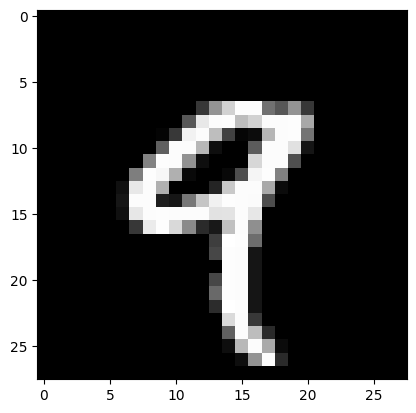

In [8]:
# Plot the first image
plt.imshow(X_train[4], cmap='gray')
plt.show()

In [9]:
y_train[4]  # label of the image

np.uint8(9)

In [10]:
# Scale the data to make the training faster and increase accuracy of the model (values will be from 0 to 1)
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# Flatten Training and Test Data into a 1D array (Single Feature Vector)
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0] # each sample is 28 x 28 pixels image 1D array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Create a simple neural network layer

# It will have 2 layers (784 nodes as input layer and 10 nodes as output layer)

In [62]:
# Output layer is 10 nodes because there are 10 classes (0-9)
model = k.Sequential([
    l.Input(shape=(784,)),           # Explicit input layer
    l.Dense(10, activation='sigmoid')  # No need for input_shape here
])



In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(X_train_flattened, y_train, epochs=5) # The accuracy is high

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9268 - loss: 0.2621
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9279 - loss: 0.2588
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9288 - loss: 0.2559
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9295 - loss: 0.2532
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9309 - loss: 0.2511


# Model Evaluation

In [21]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9269 - loss: 0.2641


[0.2640605568885803, 0.9269000291824341]

# Make predictions

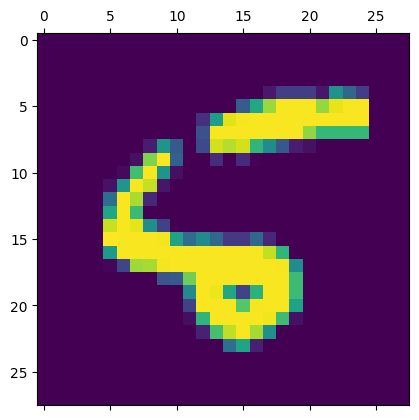

In [30]:
# Plot any image on the test set
plt.matshow(X_test[8])

In [31]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
y_predicted[8]

array([1.1278792e-01, 2.4424639e-07, 9.4027072e-03, 8.4417496e-07,
       4.6057066e-01, 5.7660425e-01, 9.9959511e-01, 1.4077694e-08,
       1.6574709e-01, 9.7495422e-06], dtype=float32)

In [36]:
np.argmax(y_predicted[8])  # Predict the output and it is correct

np.int64(6)

# Build a Confusion Matrix

In [47]:
# Convert y_predicted to concrete class labels
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:2]

[np.int64(7), np.int64(2)]

In [46]:
y_test[:2]

array([7, 2], dtype=uint8)

In [48]:
# Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)


tf.Tensor(
[[ 947    0    3    2    1    9   12    4    2    0]
 [   0 1110    3    2    0    1    4    2   13    0]
 [   3    8  934   11    8    5   11    9   40    3]
 [   2    0   22  915    1   28    2    9   25    6]
 [   1    1    6    1  928    0    7    5   11   22]
 [   7    2    5   24   11  793   10    9   28    3]
 [   6    3    9    1    7   18  909    2    3    0]
 [   1    6   25    3    9    1    0  955    3   25]
 [   4    8    6   20    9   25    8    9  878    7]
 [   6    7    3   10   37    8    0   29    9  900]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

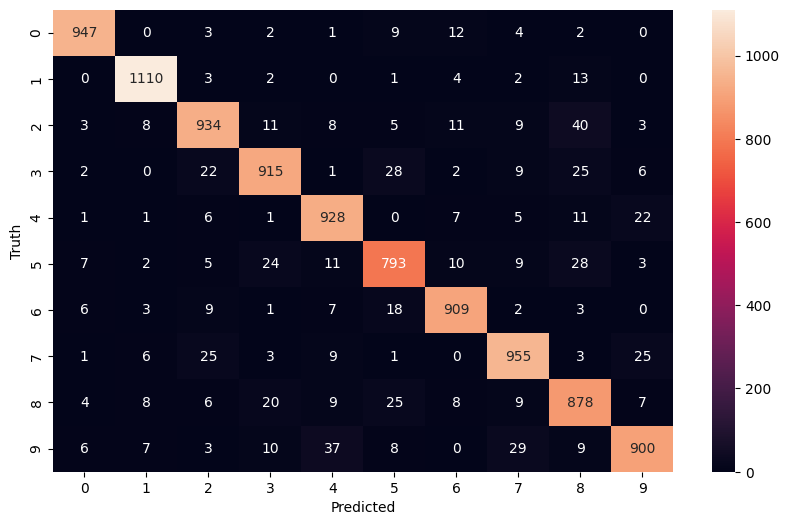

In [52]:
# Visualize Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model Hide A Hidden Layer

In [66]:
# Model
# Add one hidden layer with 100 nodes
# Define model with an explicit Input layer
model = k.Sequential([
    l.Input(shape=(784,)),          # Explicit input layer
    l.Dense(100, activation='relu'),
    l.Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9217 - loss: 0.2782
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9622 - loss: 0.1296
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9735 - loss: 0.0893
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9790 - loss: 0.0689
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9839 - loss: 0.0540


In [67]:
# Model Evaluation
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.0848


[0.08478569239377975, 0.9750999808311462]

In [56]:
# Confusion Matrix
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
tf.Tensor(
[[ 971    1    2    1    0    0    0    1    4    0]
 [   0 1120    3    1    0    1    0    0   10    0]
 [   4    3 1011    2    0    0    1    5    6    0]
 [   0    0    5  993    0    3    0    3    6    0]
 [   2    0    5    0  960    0    3    2    1    9]
 [   3    2    0   16    4  854    2    0    9    2]
 [   7    3    4    1    3    2  931    0    7    0]
 [   1    2   10    4    0    0    0 1002    3    6]
 [   4    0    2    5    3    1    1    4  953    1]
 [   3    3    0    7   10    4    0    3    5  974]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

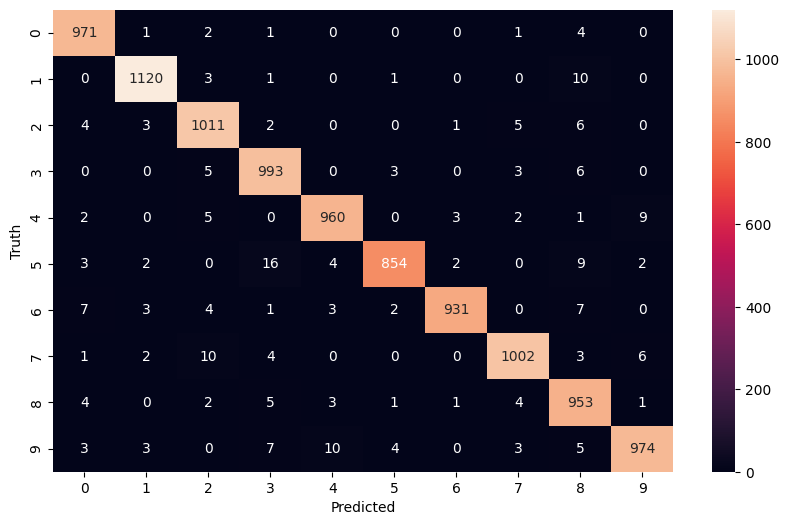

In [57]:
# Visualize Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
# A way for Keras to flatten the arrays automatically
model = k.Sequential([
    l.Input(shape=(28, 28)),         # Best practice: use Input layer
    l.Flatten(),                     # No need to pass input_shape here
    l.Dense(100, activation='relu'),
    l.Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9204 - loss: 0.2764
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9639 - loss: 0.1227
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9747 - loss: 0.0842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9800 - loss: 0.0644
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9844 - loss: 0.0500


In [65]:
# Model Evaluation
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0734


[0.07338853925466537, 0.9785000085830688]

In [60]:
# Confusion Matrix
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
tf.Tensor(
[[ 970    0    1    1    2    0    3    0    1    2]
 [   0 1118    4    3    0    0    1    2    7    0]
 [   2    0 1008    2    3    0    2    4   11    0]
 [   0    0    5  992    2    3    0    2    4    2]
 [   0    0    3    0  967    0    3    1    0    8]
 [   2    0    0    9    2  870    2    2    4    1]
 [   6    3    1    1    5    6  934    0    2    0]
 [   2    3    8    2    1    0    0 1002    3    7]
 [   6    0    7    7    8    2    0    4  934    6]
 [   3    2    0    5    9    2    0    5    0  983]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

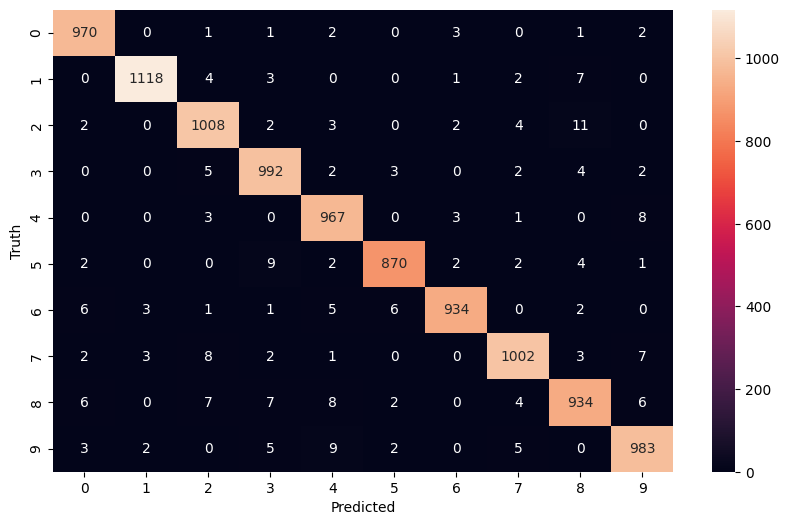

In [61]:
# Visualize Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')